# Разработка приложения 

In [1]:
import sys
import pandas as pd
import psycopg2
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QLabel, QComboBox, QLineEdit, QPushButton, QMessageBox, QInputDialog
from cryptography.fernet import Fernet
import requests
import datetime


class App(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()
        self.data_file = 'intermediate_data.csv'
        self.existing_data_file = 'C:/Users/yegor/Desktop/BI/ModuleA/cleaned_data1.csv'
        self.db_connection = self.connect_to_db()
        self.existing_data = self.load_existing_data()
        self.telegram_bot_token = '7842871681:AAEOVnIXFiWoMYo9LlMT4jxndDztJ7PFfio'  # Replace with your bot token
        self.telegram_chat_id = '1713948151'

    def initUI(self):
        layout = QVBoxLayout()

        self.region_label = QLabel('Выберите район:')
        self.region_combo = QComboBox()
        self.region_combo.addItems(['Район1', 'Район2', 'Район3', 'Район4', 'Район5', 'Район6', 'Район7', 'Район8', 'Район9', 'Район10', 'Район11', 'Район12', 'Район13', 'Район14', 'Район15', 'Район16', 'Район17', 'Район18', 'Район19', 'Район20', 'Район21', 'Район22'])

        self.contest_label = QLabel('Выберите конкурс:')
        self.contest_combo = QComboBox()
        self.contest_combo.addItems([
            "Английский язык_ШЭ_2023", "Английский язык_МЭ_2023", "Английский язык_РЭ_2023", "Английский язык_ЗЭ_2023",
            "Английский язык_ШЭ_2024", "Английский язык_МЭ_2024", "Английский язык_РЭ_2024", "Английский язык_ЗЭ_2024",
            "Астрономия_ШЭ_2023", "Астрономия_МЭ_2023", "Астрономия_РЭ_2023", "Астрономия_ЗЭ_2023",
            "Астрономия_ШЭ_2024", "Астрономия_МЭ_2024", "Астрономия_РЭ_2024", "Астрономия_ЗЭ_2024",
            "Биология_ШЭ_2023", "Биология_МЭ_2023", "Биология_РЭ_2023", "Биология_ЗЭ_2023",
            "Биология_ШЭ_2024", "Биология_МЭ_2024", "Биология_РЭ_2024", "Биология_ЗЭ_2024",
            "География_ШЭ_2023", "География_МЭ_2023", "География_РЭ_2023", "География_ЗЭ_2023",
            "География_ШЭ_2024", "География_МЭ_2024", "География_РЭ_2024", "География_ЗЭ_2024",
            "Информатика_ШЭ_2023", "Информатика_МЭ_2023", "Информатика_РЭ_2023", "Информатика_ЗЭ_2023",
            "Информатика_ШЭ_2024", "Информатика_МЭ_2024", "Информатика_РЭ_2024", "Информатика_ЗЭ_2024",
            "Искусство_ШЭ_2023", "Искусство_МЭ_2023", "Искусство_РЭ_2023", "Искусство_ЗЭ_2023",
            "Искусство_ШЭ_2024", "Искусство_МЭ_2024", "Искусство_РЭ_2024", "Искусство_ЗЭ_2024",
            "История_ШЭ_2023", "История_МЭ_2023", "История_РЭ_2023", "История_ЗЭ_2023",
            "История_ШЭ_2024", "История_МЭ_2024", "История_РЭ_2024", "История_ЗЭ_2024",
            "Испанский язык_ШЭ_2023", "Испанский язык_МЭ_2023", "Испанский язык_РЭ_2023", "Испанский язык_ЗЭ_2023",
            "Испанский язык_ШЭ_2024", "Испанский язык_МЭ_2024", "Испанский язык_РЭ_2024", "Испанский язык_ЗЭ_2024",
            "Итальянский язык_ШЭ_2023", "Итальянский язык_МЭ_2023", "Итальянский язык_РЭ_2023", "Итальянский язык_ЗЭ_2023",
            "Итальянский язык_ШЭ_2024", "Итальянский язык_МЭ_2024", "Итальянский язык_РЭ_2024", "Итальянский язык_ЗЭ_2024",
            "Китайский язык_ШЭ_2023", "Китайский язык_МЭ_2023", "Китайский язык_РЭ_2023", "Китайский язык_ЗЭ_2023",
            "Китайский язык_ШЭ_2024", "Китайский язык_МЭ_2024", "Китайский язык_РЭ_2024", "Китайский язык_ЗЭ_2024",
            "Литература_ШЭ_2023", "Литература_МЭ_2023", "Литература_РЭ_2023", "Литература_ЗЭ_2023",
            "Литература_ШЭ_2024", "Литература_МЭ_2024", "Литература_РЭ_2024", "Литература_ЗЭ_2024",
            "Математика_ШЭ_2023", "Математика_МЭ_2023", "Математика_РЭ_2023", "Математика_ЗЭ_2023",
            "Математика_ШЭ_2024", "Математика_МЭ_2024", "Математика_РЭ_2024", "Математика_ЗЭ_2024",
            "Немецкий язык_ШЭ_2023", "Немецкий язык_МЭ_2023", "Немецкий язык_РЭ_2023", "Немецкий язык_ЗЭ_2023",
            "Немецкий язык_ШЭ_2024", "Немецкий язык_МЭ_2024", "Немецкий язык_РЭ_2024", "Немецкий язык_ЗЭ_2024",
            "Обществознание_ШЭ_2023", "Обществознание_МЭ_2023", "Обществознание_РЭ_2023", "Обществознание_ЗЭ_2023",
            "Обществознание_ШЭ_2024", "Обществознание_МЭ_2024", "Обществознание_РЭ_2024", "Обществознание_ЗЭ_2024",
            "Основы безопасности жизнедеятельности_ШЭ_2023", "Основы безопасности жизнедеятельности_МЭ_2023",
            "Основы безопасности жизнедеятельности_РЭ_2023", "Основы безопасности жизнедеятельности_ЗЭ_2023",
            "Основы безопасности жизнедеятельности_ШЭ_2024", "Основы безопасности жизнедеятельности_МЭ_2024",
            "Основы безопасности жизнедеятельности_РЭ_2024", "Основы безопасности жизнедеятельности_ЗЭ_2024",
            "Право_ШЭ_2023", "Право_МЭ_2023", "Право_РЭ_2023", "Право_ЗЭ_2023",
            "Право_ШЭ_2024", "Право_МЭ_2024", "Право_РЭ_2024", "Право_ЗЭ_2024",
            "Русский язык_ШЭ_2023", "Русский язык_МЭ_2023", "Русский язык_РЭ_2023", "Русский язык_ЗЭ_2023",
            "Русский язык_ШЭ_2024", "Русский язык_МЭ_2024", "Русский язык_РЭ_2024", "Русский язык_ЗЭ_2024",
            "Технология_ШЭ_2023", "Технология_МЭ_2023", "Технология_РЭ_2023", "Технология_ЗЭ_2023",
            "Технология_ШЭ_2024", "Технология_МЭ_2024", "Технология_РЭ_2024", "Технология_ЗЭ_2024",
            "Физика_ШЭ_2023", "Физика_МЭ_2023", "Физика_РЭ_2023", "Физика_ЗЭ_2023",
            "Физика_ШЭ_2024", "Физика_МЭ_2024", "Физика_РЭ_2024", "Физика_ЗЭ_2024",
            "Физическая культура_ШЭ_2023", "Физическая культура_МЭ_2023", "Физическая культура_РЭ_2023", "Физическая культура_ЗЭ_2023",
            "Физическая культура_ШЭ_2024", "Физическая культура_МЭ_2024", "Физическая культура_РЭ_2024", "Физическая культура_ЗЭ_2024",
            "Французский язык_ШЭ_2023", "Французский язык_МЭ_2023", "Французский язык_РЭ_2023", "Французский язык_ЗЭ_2023",
            "Французский язык_ШЭ_2024", "Французский язык_МЭ_2024", "Французский язык_РЭ_2024", "Французский язык_ЗЭ_2024",
            "Химия_ШЭ_2023", "Химия_МЭ_2023", "Химия_РЭ_2023", "Химия_ЗЭ_2023",
            "Химия_ШЭ_2024", "Химия_МЭ_2024", "Химия_РЭ_2024", "Химия_ЗЭ_2024",
            "Экология_ШЭ_2023", "Экология_МЭ_2023", "Экология_РЭ_2023", "Экология_ЗЭ_2023",
            "Экология_ШЭ_2024", "Экология_МЭ_2024", "Экология_РЭ_2024", "Экология_ЗЭ_2024",
            "Экономика_ШЭ_2023", "Экономика_МЭ_2023", "Экономика_РЭ_2023", "Экономика_ЗЭ_2023",
            "Экономика_ШЭ_2024", "Экономика_МЭ_2024", "Экономика_РЭ_2024", "Экономика_ЗЭ_2024",
            "Олимпиада им. Дж.К. Максвелла по физике_РЭ_2023", "Олимпиада им. Дж.К. Максвелла по физике_ЗЭ_2023",
            "Олимпиада им. Дж.К. Максвелла по физике_РЭ_2024", "Олимпиада им. Дж.К. Максвелла по физике_ЗЭ_2024",
            "Олимпиада им. В.Я. Струве по астрономии_РЭ_2023", "Олимпиада им. В.Я. Струве по астрономии_ЗЭ_2023",
            "Олимпиада им. В.Я. Струве по астрономии_РЭ_2024", "Олимпиада им. В.Я. Струве по астрономии_ЗЭ_2024",
            "Олимпиада им. Л.Эйлера по математике_РЭ_2023", "Олимпиада им. Л.Эйлера по математике_ЗЭ_2023",
            "Олимпиада им. Л.Эйлера по математике_РЭ_2024", "Олимпиада им. Л.Эйлера по математике_ЗЭ_2024",
            "Олимпиада им. М. Келдыша по информатике_РЭ_2023", "Олимпиада им. М. Келдыша по информатике_ЗЭ_2023",
            "Олимпиада им. М. Келдыша по информатике_РЭ_2024", "Олимпиада им. М. Келдыша по информатике_ЗЭ_2024"
        ])

        self.participants_label = QLabel('Количество участников:')
        self.participants_input = QLineEdit()

        self.scores_label = QLabel('Оценки (через запятую):')
        self.scores_input = QLineEdit()

        self.save_button = QPushButton('Сохранить данные в промежуточный файл')
        self.save_button.clicked.connect(self.save_data)

        self.load_button = QPushButton('Продолжить редактирование')
        self.load_button.clicked.connect(self.load_data_for_editing)

        self.check_key_button = QPushButton("Проверить ключ")
        self.check_key_button.clicked.connect(self.check_key)

        self.fill_results_button = QPushButton("Отправить в БД")
        self.fill_results_button.clicked.connect(self.send_data_to_db)

        self.load_all_button = QPushButton("Загрузить все конкурсы и районы")
        self.load_all_button.clicked.connect(self.load_all_data)

        layout.addWidget(self.region_label)
        layout.addWidget(self.region_combo)
        layout.addWidget(self.contest_label)
        layout.addWidget(self.contest_combo)
        layout.addWidget(self.participants_label)
        layout.addWidget(self.participants_input)
        layout.addWidget(self.scores_label)
        layout.addWidget(self.scores_input)
        layout.addWidget(self.save_button)
        layout.addWidget(self.load_button)
        layout.addWidget(self.check_key_button)
        layout.addWidget(self.fill_results_button)
        layout.addWidget(self.load_all_button)
        self.setLayout(layout)
        self.setWindowTitle('Система сбора данных')
        self.show()
        self.region_combo.currentIndexChanged.connect(self.update_data)
        self.contest_combo.currentIndexChanged.connect(self.update_data)

    def update_data(self):
        region = self.region_combo.currentText()
        contest = self.contest_combo.currentText()

        try:
            df = pd.read_csv(self.data_file)
            existing_row = df[
                (df['Регион'] == region) &
                (df['Конкурс'] == contest)
            ]

            if not existing_row.empty:
                self.participants_input.setText(str(existing_row['Количество участников'].values[0]))
                self.scores_input.setText(existing_row['Оценки'].values[0])
            else:
                self.participants_input.clear()
                self.scores_input.clear()
                

        except FileNotFoundError:
            QMessageBox.warning(self, 'Ошибка', 'Промежуточный файл не найден.')

    def connect_to_db(self):
        try:
            conn = psycopg2.connect(
                dbname='olym',
                user='postgres',
                password='1234',
                host='127.0.0.1'
            )
            return conn
        except Exception as e:
            QMessageBox.critical(self, 'Ошибка', str(e))

    def load_existing_data(self):
        try:
            df = pd.read_csv(self.existing_data_file)
            return df
        except FileNotFoundError:
            QMessageBox.warning(self, 'Ошибка', 'Файл с существующими данными не найден.')
            return pd.DataFrame()

    def save_data(self):
        region = self.region_combo.currentText()
        contest = self.contest_combo.currentText()
        participants = self.participants_input.text()
        scores = self.scores_input.text()

        if not participants or not scores:
            QMessageBox.warning(self, 'Ошибка', 'Пожалуйста, заполните все поля.')
            return

        try:
            num_participants = int(participants)
            if num_participants < 0:
                QMessageBox.warning(self, 'Ошибка', 'Количество участников не может быть отрицательным.')
                return

            scores_list = list(map(float, scores.split(',')))
            if any(score < 0 for score in scores_list):
                QMessageBox.warning(self, 'Ошибка', 'Оценки не могут быть отрицательными.')
                return

        except ValueError:
            QMessageBox.warning(self, 'Ошибка', 'Пожалуйста, введите корректные числовые значения для участников и оценок.')
            return

        # Загрузка существующих данных
        try:
            df = pd.read_csv(self.data_file)
        except FileNotFoundError:
            df = pd.DataFrame(columns=['Регион', 'Конкурс', 'Количество участников', 'Оценки', 'Ключ'])

        # Генерация ключа
        self.key = Fernet.generate_key().decode()

        # Проверка наличия данных
        existing_row = df[
            (df['Регион'] == region) &
            (df['Конкурс'] == contest)
        ]

       
        # Шифрование данных
        encrypted_participants = self.encrypt_data(participants)
        encrypted_scores = self.encrypt_data(scores)

        # Обновление или добавление данных
        if not existing_row.empty:
            # Обновление существующей записи
            df.loc[
                (df['Регион'] == region) & (df['Конкурс'] == contest),
                ['Количество участников', 'Оценки', 'Ключ']
            ] = encrypted_participants, encrypted_scores, self.key
        else:
            # Добавление новой записи
            new_data = pd.DataFrame({
                'Регион': [region],
                'Конкурс': [contest],
                'Количество участников': [encrypted_participants],
                'Оценки': [encrypted_scores],
                'Ключ': [self.key]
            })
            df = pd.concat([df, new_data], ignore_index=True)
        # Сохранение обновленного DataFrame в промежуточный CSV файл
        try:
            df.to_csv(self.data_file, mode='w', header=True, index=False)  # Добавление данных
            self.create_text_file(region, contest, self.key)  # Создание текстового файла с ключом
            QMessageBox.information(self, 'Успех', 'Данные успешно сохранены в промежуточный файл.')
        except Exception as e:
            QMessageBox.critical(self, 'Ошибка', str(e))

    def create_text_file(self, region, contest, key):
        with open('data_info.txt', 'a') as text_file:
            text_file.write(f'Район: {region}\n')
            text_file.write(f'Конкурс: {contest}\n')
            text_file.write(f'Ключ: {key}\n')

    def load_data_for_editing(self):
        try:
            df = pd.read_csv(self.data_file)

            # Обновление списков районов и конкурсов
            regions = df['Регион'].unique().tolist()
            contests = df['Конкурс'].unique().tolist()

            self.region_combo.clear()
            self.region_combo.addItems(regions)

            self.contest_combo.clear()
            self.contest_combo.addItems(contests)

            QMessageBox.information(self, 'Успех', 'Списки районов и конкурсов обновлены.')
        except FileNotFoundError:
            QMessageBox.warning(self, 'Ошибка', 'Промежуточный файл не найден.')

    def check_key(self):
        region = self.region_combo.currentText()
        contest = self.contest_combo.currentText()

        try:
            df = pd.read_csv(self.data_file)

            existing_row = df[
                (df['Регион'] == region) &
                (df['Конкурс'] == contest)
            ]

            if not existing_row.empty:
                key = self.get_key_from_user()
                if not key:
                    return

                stored_key = existing_row['Ключ'].values[0]

                # Сравнение ключей с удалением лишних пробелов
                if key.strip() == stored_key.strip():
                    # Если ключ верный, загружаем данные о количестве участников и оценках
                    encrypted_participants = existing_row['Количество участников'].values[0]
                    encrypted_scores = existing_row['Оценки'].values[0]

                    # Дешифрование данных
                    participants = self.decrypt_data(encrypted_participants)
                    scores = self.decrypt_data(encrypted_scores)

                    self.participants_input.setText(participants)
                    self.scores_input.setText(scores)
                    QMessageBox.information(self, 'Успех', 'Ключ верный. Данные загружены.')
                else:
                    QMessageBox.warning(self, 'Ошибка', 'Неверный ключ. Доступ к данным запрещен.')
            else:
                self.participants_input.clear()
                self.scores_input.clear()
                QMessageBox.warning(self, 'Ошибка', 'Нет данных для выбранного региона и конкурса.')
        except FileNotFoundError:
            QMessageBox.warning(self, 'Ошибка', 'Промежуточный файл не найден.')
    
    def get_key_from_user(self):
        key, ok = QInputDialog.getText(self, 'Введите ключ', 'Пожалуйста, введите ключ для доступа к данным:')
        if ok:
            return key
        return None

    def send_data_to_db(self):
        region = self.region_combo.currentText()
        contest = self.contest_combo.currentText()
        participants = self.participants_input.text()
        scores = self.scores_input.text()

        if not participants or not scores:
            QMessageBox.warning(self, 'Ошибка', 'Пожалуйста, заполните все поля.')
            return

        try:
            cursor = self.db_connection.cursor()
            scores_list = list(map(float, scores.split(',')))

            # Проверка на количество участников
            num_participants = int(participants)
            if num_participants <= 0:
                QMessageBox.warning(self, 'Ошибка', 'Количество участников должно быть больше нуля.')
                return

            # Проверка на количество оценок
            num_scores = len(scores_list)
            if num_scores > num_participants:
                QMessageBox.warning(self, 'Ошибка', 'Количество оценок не должно превышать количество участников.')
                return
            elif num_scores < num_participants:
                QMessageBox.warning(self, 'Ошибка', 'Количество оценок должно быть не меньше количества участников.')
                # Сохранение в промежуточный файл
                with open('intermediate_file.txt', 'w') as f:
                    f.write(f'Регион: {region}, Конкурс: {contest}, Участники: {num_participants}, Оценки: {scores}\n')
                return

            # Проверка на отрицательные значения
            if any(score < 0 for score in scores_list):
                QMessageBox.warning(self, 'Ошибка', 'Оценки не могут быть отрицательными.')
                return

            # Расчет среднего балла
            average_score = sum(scores_list) / num_participants if scores_list else 0

            cursor.execute("""
                INSERT INTO olympiad_results3 (region, contest, participants, scores, average_score)
                VALUES (%s, %s, %s, %s, %s)
            """, (region, contest, num_participants, scores, average_score))

            self.db_connection.commit()
            cursor.close()
            QMessageBox.information(self, 'Успех', 'Данные успешно отправлены в БД.')

            # Send notification to Telegram
            self.send_telegram_notification(region, contest, num_participants, scores, average_score)

        except Exception as e:
            QMessageBox.critical(self, 'Ошибка', str(e))

    def send_telegram_notification(self, region, contest, participants, scores, average_score):
          # Получение текущей даты и времени
        current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
        message = f"Данные успешно отправлены в БД:\n" \
                  f"Дата и время: {current_time}\n" \
                  f"Регион: {region}\n" \
                  f"Конкурс: {contest}\n" \
                  f"Количество участников: {participants}\n" \
                  f"Оценки: {scores}\n" \
                  f"Средний балл: {average_score:.2f}"

        url = f"https://api.telegram.org/bot{self.telegram_bot_token}/sendMessage"
        payload = {
            'chat_id': self.telegram_chat_id,
            'text': message
        }

        try:
            response = requests.post(url, json=payload)
            response.raise_for_status()   
        except requests.exceptions.RequestException as e:
            QMessageBox.critical(self, 'Ошибка', f'Не удалось отправить уведомление в Telegram: {str(e)}')
    def load_all_data(self):
        try:
            df = pd.read_csv(self.existing_data_file)
            regions = df['Район'].unique().tolist()
            contests = df['Конкурс'].unique().tolist()

            self.region_combo.clear()
            self.region_combo.addItems(regions)

            self.contest_combo.clear()
            self.contest_combo.addItems(contests)

            QMessageBox.information(self, 'Успех', 'Данные успешно загружены из файла.')
        except Exception as e:
            QMessageBox.critical(self, 'Ошибка', str(e))
    def encrypt_data(self, data):
        fernet = Fernet(self.key)
        encrypted_data = fernet.encrypt(data.encode())
        return encrypted_data.decode()

    def decrypt_data(self, encrypted_data):
        fernet = Fernet(self.key)
        decrypted_data = fernet.decrypt(encrypted_data.encode())
        return decrypted_data.decode()
if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = App()
    sys.exit(app.exec_())

SystemExit: 0

C:\Users\yegor\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


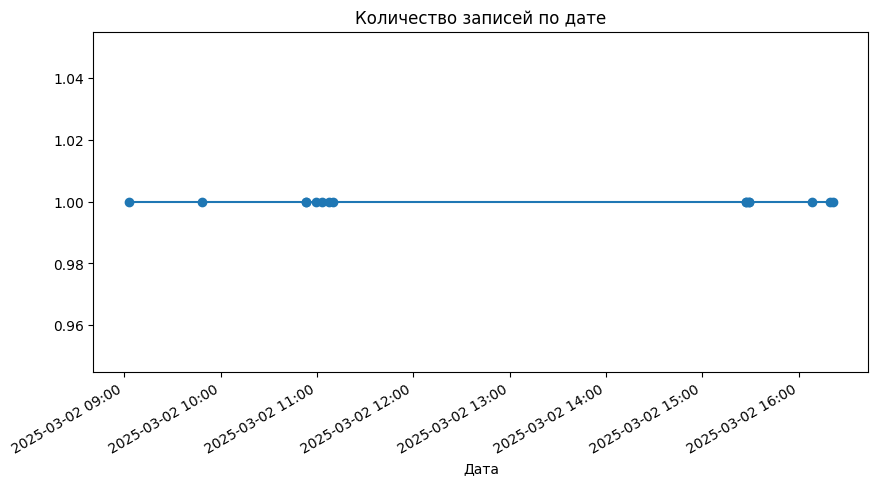

SystemExit: 0

C:\Users\yegor\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
import psycopg2
from PyQt5 import QtWidgets, QtGui
from PyQt5.QtWidgets import QVBoxLayout, QLabel, QLineEdit, QPushButton, QTableWidget, QTableWidgetItem
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

class MonitoringApp(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()  # Инициализация пользовательского интерфейса
        # Подключение к базе данных PostgreSQL
        self.conn = psycopg2.connect(dbname='olym', user='postgres', password='1234', host='127.0.0.1')

    def initUI(self):
        self.setWindowTitle('Система мониторинга')  # Заголовок окна
        self.setGeometry(100, 100, 800, 600)  # Размеры окна

        layout = QVBoxLayout()  # Вертикальный компоновщик

        # Поле ввода для региона
        self.region_input = QLineEdit(self)
        self.region_input.setPlaceholderText('Введите регион')
        layout.addWidget(self.region_input)

        # Поле ввода для названия олимпиады
        self.contest_input = QLineEdit(self)
        self.contest_input.setPlaceholderText('Введите название олимпиады')
        layout.addWidget(self.contest_input)

        # Кнопка для поиска записей
        self.search_button = QPushButton('Поиск', self)
        self.search_button.clicked.connect(self.search_records)  # Подключение метода поиска к кнопке
        layout.addWidget(self.search_button)

        # Метка для отображения количества записей
        self.record_count_label = QLabel('Количество записей: 0', self)
        layout.addWidget(self.record_count_label)

        # Таблица для отображения результатов поиска
        self.table = QTableWidget(self)
        self.table.setColumnCount(6)  # Установка количества столбцов
        self.table.setHorizontalHeaderLabels(['ID', 'Регион', 'Конкурс', 'Участники', 'Средний балл', 'Дата'])  # Заголовки столбцов
        layout.addWidget(self.table)

        # Кнопка для построения графика
        self.plot_button = QPushButton('Построить график', self)
        self.plot_button.clicked.connect(self.plot_data)  # Подключение метода построения графика к кнопке
        layout.addWidget(self.plot_button)

        self.setLayout(layout)  # Установка компоновщика для виджета

    def search_records(self):
        # Получение значений из полей ввода
        region = self.region_input.text()
        contest = self.contest_input.text()

        cursor = self.conn.cursor()  # Создание курсора для выполнения запросов
        # SQL-запрос для поиска записей по региону и названию олимпиады
        query = "SELECT * FROM olympiad_results WHERE region ILIKE %s AND contest ILIKE %s"
        cursor.execute(query, (f'%{region}%', f'%{contest}%'))  # Выполнение запроса
        records = cursor.fetchall()  # Получение всех записей
        cursor.close()  # Закрытие курсора

        # Обновление метки с количеством записей
        self.record_count_label.setText(f'Количество записей: {len(records)}')
        self.table.setRowCount(len(records))  # Установка количества строк в таблице

        # Заполнение таблицы данными
        for row_idx, row in enumerate(records):
            for col_idx, item in enumerate(row):
                self.table.setItem(row_idx, col_idx, QTableWidgetItem(str(item)))  # Добавление данных в ячейку таблицы

    def plot_data(self):
        cursor = self.conn.cursor()  # Создание курсора для выполнения запросов
        # SQL-запрос для получения количества записей по дате
        cursor.execute("SELECT created_at, COUNT(*) FROM olympiad_results GROUP BY created_at ORDER BY created_at")
        data = cursor.fetchall()  # Получение всех данных
        cursor.close()  # Закрытие курсора

        if not data:  # Если данных нет, выходим из метода
            return

        dates, counts = zip(*data)  # Разделение данных на даты и количество записей

        # Построение графика
        plt.figure(figsize=(10, 5))
        plt.plot(dates, counts, marker='o')  # Построение линии с маркерами
        plt.title('Количество записей по дате')  # Заголовок графика
        plt.xlabel('Дата')  # Подпись оси X plt.ylabel('Количество записей')  # Подпись оси Y
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))  # Форматирование дат на оси X
        plt.gcf().autofmt_xdate()  # Автоматическое форматирование дат
        plt.show()  # Отображение графика

    def closeEvent(self, event):
        self.conn.close()  # Закрытие соединения с базой данных при закрытии приложения

if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # Создание экземпляра приложения
    ex = MonitoringApp()  # Создание экземпляра класса MonitoringApp
    ex.show()  # Отображение окна приложения
    sys.exit(app.exec_())  # Запуск основного цикла приложения

# Анализ требований для основного приложения

# Функциональные требования:

Интерфейс пользователя:
Возможность выбора района и конкурса из выпадающих списков.
Поля для ввода количества участников и оценок.
Кнопки для сохранения данных, загрузки данных для редактирования, проверки ключа, отправки данных в базу данных и загрузки всех конкурсов и районов.
Обработка данных:
Сохранение введенных данных в промежуточный CSV файл.
Загрузка существующих данных из файла для редактирования.
Шифрование и дешифрование данных с использованием ключа.
Отправка данных в базу данных PostgreSQL.
Отправка уведомлений в Telegram о результатах отправки данных.
Валидация данных:
Проверка корректности введенных данных (числовые значения, отсутствие отрицательных значений).
Проверка соответствия количества оценок количеству участников.
# Необходимые ресурсы:

Оперативная память:
Минимум 4 ГБ для базового функционирования приложения.
Рекомендуется 8 ГБ или более для обработки больших объемов данных и многозадачности.
Процессорная мощность:
Минимум двухъядерный процессор с тактовой частотой 2.0 ГГц.

Рекомендуется четырехъядерный процессор для более быстрой обработки данных и улучшенной производительности.

# Рекомендации по масштабированию системы

Горизонтальное масштабирование:

Добавление серверов:
Увеличение числа серверов для обработки запросов и хранения данных. Это позволит распределить нагрузку и улучшить производительность.
Использование облачных решений:
Переход на облачные платформы (например, AWS, Azure) для динамического масштабирования ресурсов в зависимости от нагрузки.
Вертикальное масштабирование:

Увеличение ресурсов существующего сервера:
Увеличение объема оперативной памяти и процессорной мощности на текущем сервере для улучшения производительности.
Оптимизация базы данных:
Использование индексов и оптимизация запросов для повышения скорости обработки данных в базе данных.
Эти рекомендации помогут обеспечить стабильную работу системы при увеличении нагрузки и объема обрабатываемых данных.

# Анализ требований для системы мониторинга

1. Анализ требований
# Функциональные требования
Пользовательский интерфейс:

Поля ввода для фильтрации данных по региону и названию олимпиады.
Кнопка для выполнения поиска записей.
Метка для отображения количества найденных записей.
Таблица для отображения результатов поиска с возможностью отображения следующих столбцов:
ID
Регион
Конкурс
Участники
Средний балл
Дата
Кнопка для построения графика, отображающего количество записей по дате.
Обработка данных:

Подключение к базе данных PostgreSQL для выполнения SQL-запросов.
Выполнение запросов для поиска записей по введенным критериям.
Построение графиков на основе данных из базы данных.
Валидация данных:

Проверка корректности введенных данных (например, наличие текста в полях ввода).
Обработка ошибок при выполнении SQL-запросов и подключении к базе данных.
Отображение данных:

Обновление таблицы с результатами поиска.
Отображение графиков с использованием Matplotlib.
Закрытие приложения:

Корректное закрытие соединения с базой данных при завершении работы приложения.
# Необходимые ресурсы
Оперативная память:

Минимум 4 ГБ для базового функционирования приложения.
Рекомендуется 8 ГБ или более для обработки больших объемов данных и многозадачности.
Процессорная мощность:

Минимум двухъядерный процессор с тактовой частотой 2.0 ГГц.
Рекомендуется четырехъядерный процессор для более быстрой обработки данных и улучшенной производительности.
Хранилище:

Достаточное количество дискового пространства для хранения базы данных и временных файлов (рекомендуется не менее 10 ГБ).
Сетевые ресурсы:

Стабильное интернет-соединение (если база данных размещена удаленно).
#  Рекомендации по масштабированию системы
Горизонтальное масштабирование
Добавление серверов:

Увеличение числа серверов для обработки запросов и хранения данных. Это позволит распределить нагрузку и улучшить производительность.
Использование кластеров баз данных (например, PostgreSQL с репликацией) для повышения доступности и отказоустойчивости.
Использование облачных решений:

Переход на облачные платформы (например, AWS, Azure) для динамического масштабирования ресурсов в зависимости от нагрузки.
Использование контейнеризации (например, Docker) для упрощения развертывания и управления приложением.
Балансировка нагрузки:

Внедрение балансировщиков нагрузки для распределения входящих запросов между несколькими серверами, что поможет избежать перегрузки отдельных узлов.
Вертикальное масштабирование
Увеличение ресурсов существующего сервера:

Увеличение объема оперативной памяти и процессорной мощности на текущем сервере для улучшения производительности.
Замена устаревшего оборудования на более мощное (например, более быстрые процессоры и SSD вместо HDD).
Оптимизация базы данных:

Использование индексов и оптимизация запросов для повышения скорости обработки данных в базе данных.
Регулярное обслуживание базы данных (например, очистка ненужных данных, оптимизация таблиц).
Мониторинг и анализ производительности:

Внедрение инструментов мониторинга для отслеживания производительности системы и выявления узких мест.
Регулярный анализ нагрузки и производительности для определения необходимости в масштабировании.